# Baldwin-Philips-Terlevich Diagrams and Line Fitting

# Диаграммы Болдуина-Филипса-Терлевича  (BPT) и нелинейная  аппроксимация формы спектральных линий


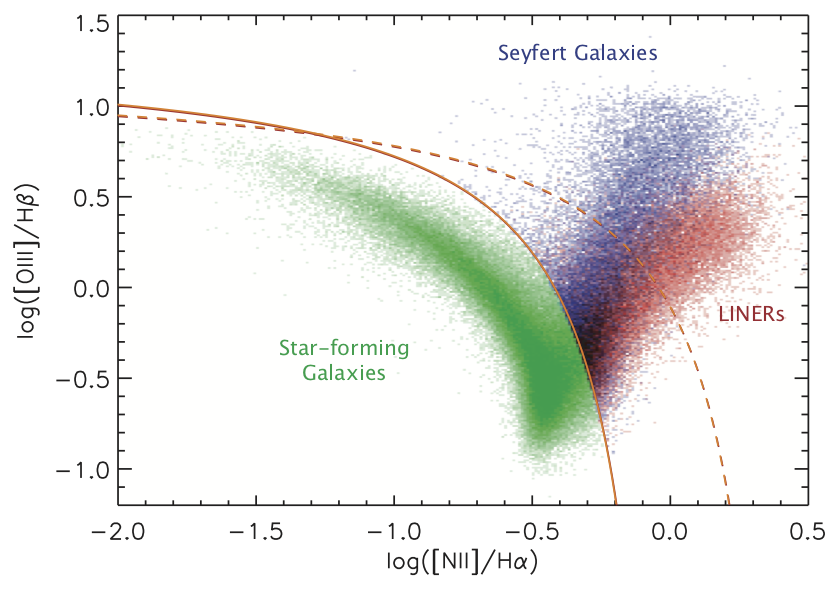

Baldwin-Philips-Terlovich (BPT) diagrams are one way we can use emission lines to classify galaxies.  Today, we are going to use BPT diagrams to classify the galaxy NGC6946 (Jessica's favorite!).  First, we will make our own BPT diagram using SDSS DR8 data, then we will determine the four line fluxes for NGC6946 using optical spectra from Lira et al, 2007 (https://ui.adsabs.harvard.edu/abs/2007MNRAS.382.1552L/abstract).  We will need to extract the H$\alpha$ ($\lambda = 6563\overset{\circ}{\rm{A}}$), H$\beta$ ($\lambda = 4861 \overset{\circ}{\rm{A}}$), [NII] ($\lambda = 6584 \overset{\circ}{\rm{A}}$), and [OII] ($\lambda = 5008 \overset{\circ}{\rm{A}}$) lines.

Диаграммы Болдуина-Филипса-Терловича (BPT) - это один из способов использования эмиссионных линий для классификации галактик.  Сегодня мы будем использовать BPT-диаграммы для классификации галактики NGC6946 (любимой галактики Джессики!).  Сначала мы построим собственную BPT-диаграмму, используя данные SDSS DR8, затем определим потоки четырех линий для NGC6946, используя оптические спектры из Lira et al, 2007 (https://ui.adsabs.harvard.edu/abs/2007MNRAS.382.1552L/abstract).  Нам нужно будет извлечь H$\alpha$ ($\lambda = 6563\overset{\circ}{\rm{A}}$), H$\beta$ ($\lambda = 4861 \overset{\circ}{\rm{A}}$), [NII] ($\lambda = 6584 \overset{\circ}{\rm{A}}$), и [OII] ($\lambda = 5008 \overset{\circ}{\rm{A}}$) линии.  

First, let's import the tools we will use.

Во-первых, давайте импортируем инструменты, которые мы будем использовать.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import pandas as pd
from astropy.modeling import models, fitting

Data from https://www.sdss.org/dr14/spectro/galaxy_mpajhu/
SDSS DR8 spectra properties

Данные с сайта https://www.sdss.org/dr14/spectro/galaxy_mpajhu/
Свойства спектров SDSS DR8

In [3]:
hdu = fits.open('abbrev_SDSSDR8.fits')

We can see what information is in this file by printing the column names.

Мы можем увидеть, какая информация содержится в этом файле, распечатав названия столбцов.

In [7]:
cols = hdu[1].columns
cols.info

<bound method ColDefs.info of ColDefs(
    name = 'SPECOBJID'; format = '19A'
    name = 'MJD'; format = 'J'
    name = 'PLATEID'; format = 'I'
    name = 'FIBERID'; format = 'I'
    name = 'SIGMA_BALMER'; format = 'E'
    name = 'SIGMA_BALMER_ERR'; format = 'E'
    name = 'SIGMA_FORBIDDEN'; format = 'E'
    name = 'SIGMA_FORBIDDEN_ERR'; format = 'E'
    name = 'V_OFF_BALMER'; format = 'E'
    name = 'V_OFF_BALMER_ERR'; format = 'E'
    name = 'V_OFF_FORBIDDEN'; format = 'E'
    name = 'V_OFF_FORBIDDEN_ERR'; format = 'E'
    name = 'OII_3726_CONT'; format = 'E'
    name = 'OII_3726_CONT_ERR'; format = 'E'
    name = 'OII_3726_REQW'; format = 'E'
    name = 'OII_3726_REQW_ERR'; format = 'E'
    name = 'OII_3726_EQW'; format = 'E'
    name = 'OII_3726_EQW_ERR'; format = 'E'
    name = 'OII_3726_SEQW'; format = 'E'
    name = 'OII_3726_SEQW_ERR'; format = 'E'
    name = 'OII_3726_FLUX'; format = 'E'
    name = 'OII_3726_FLUX_ERR'; format = 'E'
    name = 'OII_3726_INST_RES'; format = 'E'


Use the following code and the data you just loaded to replicate the plot pictured above with the SDSS DR8 data.  You'll need to add some data to the figure I've set up for you.  Make sure you match the x and y labels I've set up!

Используйте следующий код и данные, которые вы только что загрузили, чтобы воспроизвести график, изображенный выше, с данными SDSS DR8.  Вам нужно будет добавить некоторые данные на рисунок, который я для вас создал.  Убедитесь, что вы совместили метки x и y, которые я установил!

/home/kv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/kv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/kv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/kv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/kv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/kv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarni

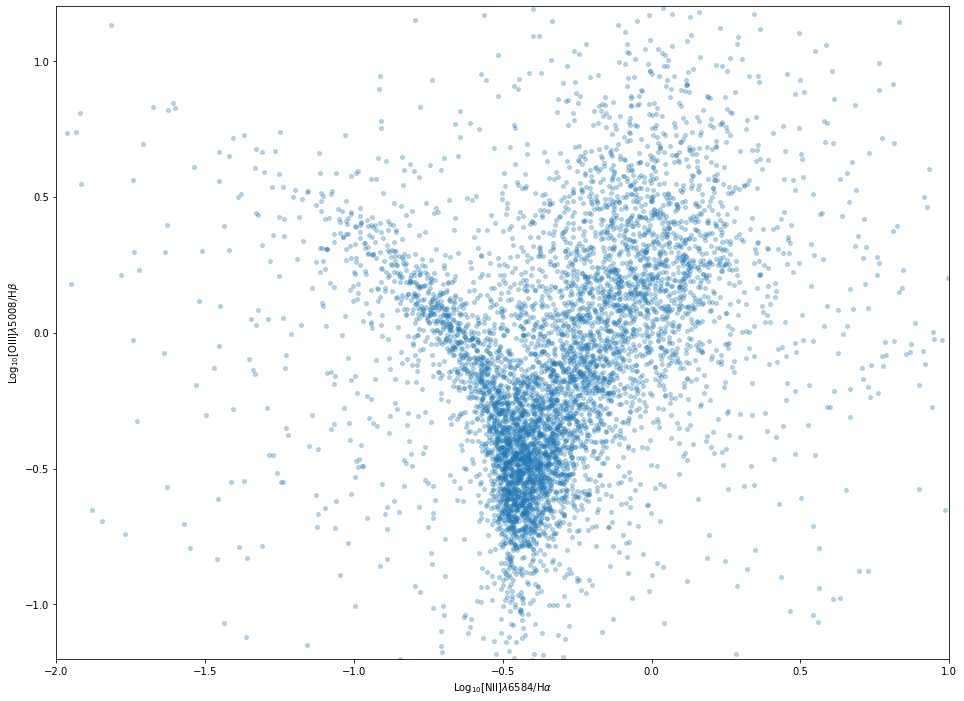

In [21]:
data = hdu[1].data
data = data[0:10000]
plt.figure(figsize=(16, 12))
plt.xlim(-2.0, 1.0)
plt.ylim(-1.2, 1.2)
OIII = hdu[1].data['OIII_5007_FLUX'] 
Hb = hdu[1].data['H_BETA_FLUX'] 
NII = hdu[1].data['NII_6584_FLUX'] 
Ha = hdu[1].data['H_ALPHA_FLUX'] 
x=np.log10(NII/Ha)
y=np.log10(OIII/Hb)
plt.scatter(x,y, s=15, alpha=0.3)
plt.xlabel('Log$_{10}$[NII]$\\lambda$6584/H$\\alpha$')
plt.ylabel('Log$_{10}$[OIII]$\\lambda$5008/H$\\beta$')
plt.show()

Now, let's add NGC6946!  First, load and examine the spectra from the Lira et al paper.

Теперь добавим NGC6946!  Сначала загрузите и изучите спектры из статьи Lira et al.

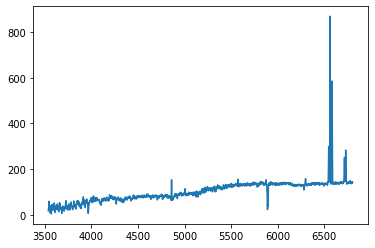

In [22]:
line = pd.read_csv('NGC_6946_Full_Opt_l2015.txt', delim_whitespace=True, comment='#')
plt.plot(line['Wavelength'], line['Flux'])
plt.show()

In order to determine fluxes, we are going to model each line as a gaussian.  We will need to make cut-outs of the data around each line, and subtract the underlying continuum to do this.  I've gone ahead and completed this process for H$\alpha$ with the following code.  You will need to repeat the process for H$\beta$, [NII], and [OIII]

Для определения потоков мы будем моделировать каждую линию как гаусс.  Для этого нам нужно будет сделать вырезки данных вокруг каждой линии и вычесть лежащий в их основе континуум.  Я выполнил этот процесс для H$\alpha$ с помощью следующего кода.  Вам нужно будет повторить процесс для H$\beta$, [NII] и [OIII].


In [23]:
model = models.Gaussian1D()
fit = fitting.LevMarLSQFitter()

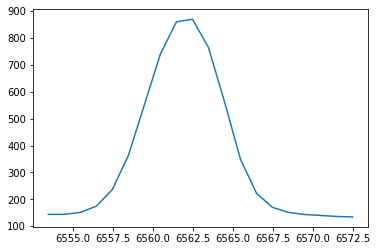

In [24]:
halpha = line[(line['Wavelength']>6553.0) & (line['Wavelength']<6573.0)]
plt.plot(halpha['Wavelength'], halpha['Flux'])
plt.show()


Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev     
    ----------------- ------------------- -----------------
    739.5020550886197 -3.0126194389693355 2.159652519221705


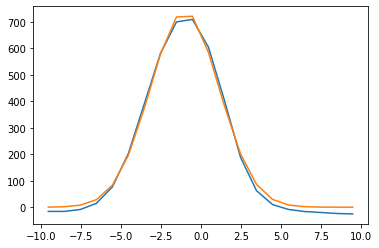

In [26]:
cont = line[(line['Wavelength']<6555.0) & (line['Wavelength']>6550.0)]
cont_flux = np.mean(cont['Flux'])
best_fit  = fit(model, halpha['Wavelength']-6565.0, halpha['Flux']-cont_flux)
print(best_fit)
plt.plot(halpha['Wavelength']-6563.0, halpha['Flux']-cont_flux)
plt.plot(halpha['Wavelength']-6563.0, best_fit(halpha['Wavelength']-6565.0))
plt.show()

We can now calculate the flux of this line using our gaussian fit by integrating under the curve.  The integral for a gaussian is:
$$ \sqrt{2 \pi  \sigma} \times a $$
where a is our amplitude.  

Теперь мы можем рассчитать поток этой линии, используя нашу гауссову подгонку, интегрируя под кривой.  Интеграл для гауссианы имеет вид:
$$ \sqrt{2 \pi \sigma} \times a $$
где a - наша амплитуда.  

In [27]:
halpha_flux = np.sqrt(2.0*np.pi*best_fit.stddev)*best_fit.amplitude
print(halpha_flux)

2724.0887932750725


Now we have our H$\alpha$ flux!  Since we are only using ratios, I'm not going to worry about units.  Repeat this process for H$\beta$, [NII], and [OIII].

Теперь у нас есть наш поток H$\alpha$!  Поскольку мы используем только соотношения, я не буду беспокоиться о единицах измерения.  Повторите этот процесс для H$\beta$, [NII] и [OIII].

In [28]:
hdu[1].data['OIII_5007_FLUX']

array([ 72.29009   ,   0.20092708,  88.41073   , ..., 134.60176   ,
       153.97737   ,  11.113441  ], dtype=float32)

In [30]:
data['OIII_5007_FLUX']

array([ 72.29009   ,   0.20092708,  88.41073   , ..., 134.60176   ,
       153.97737   ,  11.113441  ], dtype=float32)

Once you have all four fluxes, re-make the BPT diagram and add NGC6946.  Referring to the figure at the top of this notebook, what type of galaxy do you think NGC6946 is?

Когда у вас будут все четыре потока, переделайте диаграмму BPT и добавьте NGC6946.  Ссылаясь на рисунок в начале этой тетради, как вы думаете, к какому типу галактик относится NGC6946?